In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [233]:
disease = pd.read_csv('inf_dis.csv')

In [234]:
adj_dis = disease[['Year','County','Disease','Sex','Count','Population']]

In [235]:
dis_tot = adj_dis[adj_dis.Sex=='Total']

In [236]:
dis_prep = dis_tot.drop('Sex',axis=1)

In [237]:
dcn = dis_prep[dis_prep.County != 'California']

In [238]:
# changed dis_prep to dcn
indicmat = (pd.pivot_table(dcn, index = ['Year', 'County'], 
            columns = 'Disease', 
            values = 'Count')
            .fillna(0)
            .reset_index())

c = indicmat.drop(index=5)
c1 = c.iloc[:,2:]
c3 = c.sort_values(['County','Year'])
c4 = c3.set_index(['County','Year'])
c4.sort_index(inplace=True)
zonemat= c4.drop(['Anthrax', 'Domoic Acid Poisoning'],axis=1)
# disease profile indexed by county, year 

In [239]:
#ml01 = zonemat.loc[(slice(None),2001),:].reset_index().drop(['County','Year'],axis=1)
ml02 = zonemat.loc[(slice(None),2002),:].reset_index().drop(['County','Year'],axis=1)
ml03 = zonemat.loc[(slice(None),2003),:].reset_index().drop(['County','Year'],axis=1)
ml04 = zonemat.loc[(slice(None),2004),:].reset_index().drop(['County','Year'],axis=1)
ml05 = zonemat.loc[(slice(None),2005),:].reset_index().drop(['County','Year'],axis=1)
ml06 = zonemat.loc[(slice(None),2006),:].reset_index().drop(['County','Year'],axis=1)
ml07 = zonemat.loc[(slice(None),2007),:].reset_index().drop(['County','Year'],axis=1)
ml08 = zonemat.loc[(slice(None),2008),:].reset_index().drop(['County','Year'],axis=1)
ml09 = zonemat.loc[(slice(None),2009),:].reset_index().drop(['County','Year'],axis=1)
ml10 = zonemat.loc[(slice(None),2010),:].reset_index().drop(['County','Year'],axis=1)
ml11 = zonemat.loc[(slice(None),2011),:].reset_index().drop(['County','Year'],axis=1)
ml12 = zonemat.loc[(slice(None),2012),:].reset_index().drop(['County','Year'],axis=1)
ml13 = zonemat.loc[(slice(None),2013),:].reset_index().drop(['County','Year'],axis=1)
ml14 = zonemat.loc[(slice(None),2014),:].reset_index().drop(['County','Year'],axis=1)
ml15 = zonemat.loc[(slice(None),2015),:].reset_index().drop(['County','Year'],axis=1)
#print(np.mean(ml15.Amebiasis),np.var(ml15.Amebiasis))
# neg binom, all cols with be just like this 
# PREDICT LAST YEAR GIVEN ALL PREVIOUS YEARS, THEN FORECAST
#ml11.info()

In [240]:
Y = ml15.Amebiasis
#X1 = ml01.Amebiasis
X2 = ml02.Amebiasis
X3 = ml03.Amebiasis
X4 = ml04.Amebiasis
X5 = ml05.Amebiasis
X6 = ml06.Amebiasis
X7 = ml07.Amebiasis
X8 = ml08.Amebiasis
X9 = ml09.Amebiasis
X10 = ml10.Amebiasis
X11 = ml11.Amebiasis
X12 = ml12.Amebiasis
X13 = ml13.Amebiasis
X14 = ml14.Amebiasis

In [241]:
tsD = pd.concat([X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y], axis=1)
cols = []
count = 1
for c in tsD.columns:
    if c == 'Amebiasis':
        cols.append('Amebiasis_'+ str(count))
        count+=1
        continue
    cols.append(column)
tsD.columns = cols

In [242]:
tsD.columns

Index(['Amebiasis_1', 'Amebiasis_2', 'Amebiasis_3', 'Amebiasis_4',
       'Amebiasis_5', 'Amebiasis_6', 'Amebiasis_7', 'Amebiasis_8',
       'Amebiasis_9', 'Amebiasis_10', 'Amebiasis_11', 'Amebiasis_12',
       'Amebiasis_13', 'Amebiasis_14'],
      dtype='object')

In [243]:
tsD = tsD.rename({'Amebiasis_2': 'X2', 'Amebiasis_3': 'X3', 'Amebiasis_4': 'X4', 
                 'Amebiasis_5': 'X5', 'Amebiasis_6': 'X6', 'Amebiasis_7': 'X7', 'Amebiasis_8': 'X8', 
                 'Amebiasis_9': 'X9', 'Amebiasis_10': 'X10', 'Amebiasis_11': 'X11', 'Amebiasis_12': 'X12', 
                 'Amebiasis_13': 'X13', 'Amebiasis_14': 'X14', 'Amebiasis_15': 'Y'}, axis='columns')

In [244]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

formula = 'Y ~ X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14'
nb = glm(formula = formula, data = tsD, family = sm.families.NegativeBinomial()).fit()

print(nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   58
Model:                            GLM   Df Residuals:                       44
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.870
Date:                Fri, 05 Jul 2019   Deviance:                       36.950
Time:                        14:41:44   Pearson chi2:                     34.3
No. Iterations:                    13   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7322      0.278     -2.636      0.008      -1.277      -0.188
X2            -0.0295      0.056     -0.529      0.5

In [245]:
np.exp(nb.params)
#X1
# All but X1 have 58 observations, why?

# NEXT STEP: PCA

Intercept    0.480832
X2           0.970933
X3           0.984748
X4           1.147925
X5           0.945141
X6           1.044880
X7           1.075296
X8           1.004628
X9           0.671124
X10          0.995143
X11          1.001694
X12          1.251863
X13          1.160956
X14          1.143612
dtype: float64

In [246]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(X2)
# because volume levels of count are so small, it appears there is no problem of stationarity

In [247]:
#all but X1 have 58 obs.
#len(X1)
tsD['fit_vals'] = nb.fittedvalues

In [248]:
#plt.subplots(figsize=(16,10))

#sns.regplot(Y, X2,data=tsD,fit_reg=True,y_jitter=0.3,
#            line_kws={'color':'green','label':'LM fit'})
# error: x and y must have same first dimension, but have shapes (1,) and (14,)
#[X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14]
#[tsD.X2,tsD.X3,tsD.X4,tsD.X5,tsD.X6,tsD.X7,tsD.X8,tsD.X9,tsD.X10,tsD.X11,tsD.X12,tsD.X13,tsD.X14]
# they can only be plotted one at a time 

In [249]:
#sns.scatterplot('X','fit_vals',data=tsD,color='red',label='Poisson')

In [250]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
zCopy = zonemat.copy()

In [251]:
tsne_features = m.fit_transform(zCopy)
tsne_features

array([[ -7.550203 , -25.774769 ],
       [ -7.384083 , -26.220446 ],
       [ -6.789923 , -26.572487 ],
       ...,
       [ -2.7000291,  24.059502 ],
       [-22.087378 ,   3.9726915],
       [-23.059975 ,   4.563959 ]], dtype=float32)

In [252]:
#zonemat
zCopy['x'] = tsne_features[:,0]
zCopy['y'] = tsne_features[:,1]
zC1 = zCopy.copy()
zC1 = zC1.reset_index()
zC1.head()

Disease,County,Year,Amebiasis,Anaplasmosis and Ehrlichiosis,Babesiosis,"Botulism, Foodborne","Botulism, Other","Botulism, Wound",Brucellosis,Campylobacteriosis,...,Streptococcal Infection (cases in food and dairy workers),Toxic Shock Syndrome (Non-Streptococcal),Trichinosis,Tularemia,"Typhoid Fever, case",Typhus Fever,Vibrio Infection (non-Cholera),Yersiniosis,x,y
0,Alameda,2001,16.0,0.0,0.0,0.0,0.0,0.0,1.0,252.0,...,1.0,1.0,1.0,0.0,9.0,0.0,8.0,8.0,-7.550203,-25.774769
1,Alameda,2002,9.0,0.0,0.0,0.0,0.0,1.0,1.0,359.0,...,0.0,0.0,0.0,0.0,6.0,0.0,3.0,8.0,-7.384083,-26.220446
2,Alameda,2003,6.0,0.0,0.0,0.0,0.0,5.0,0.0,300.0,...,0.0,1.0,0.0,0.0,11.0,0.0,4.0,11.0,-6.789923,-26.572487
3,Alameda,2004,7.0,1.0,0.0,0.0,0.0,1.0,1.0,310.0,...,0.0,0.0,0.0,1.0,9.0,0.0,12.0,9.0,-4.835253,-24.458271
4,Alameda,2005,9.0,0.0,0.0,0.0,0.0,1.0,1.0,326.0,...,0.0,0.0,0.0,0.0,8.0,0.0,9.0,16.0,-4.911637,-24.606434


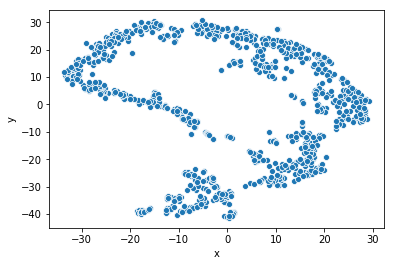

In [253]:
sns.scatterplot(x='x',y='y',data=zCopy)
plt.show()

Prep for Merge

In [254]:
disease['County'] = disease['County'].str.strip(' ')

In [255]:
pi1 = pd.read_csv('pi1.csv')
pi2 = pd.read_csv('pi2.csv')
pi3 = pd.read_csv('pi3.csv')
pi4 = pd.read_csv('pi4.csv')
pi5 = pd.read_csv('pi5.csv')
pi6 = pd.read_csv('pi6.csv')
pi7 = pd.read_csv('pi7.csv')
pi8 = pd.read_csv('pi8.csv')

In [256]:
pii1 = pi1.loc[2:,:]
pii1.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", 
                     "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", 
                     "Unnamed: 4":"2001", "Unnamed: 5":"2002"}, inplace=True)

C:\Users\aufst\OneDrive\Music\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [257]:
pii1 = pii1.dropna()
pii1['Description'] = pii1['Description'].str.lstrip()

In [258]:
pii2 = pi2.loc[2:,:]
pii2.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", "Unnamed: 4":"2003", "Unnamed: 5":"2004"}, inplace=True)
pii3 = pi3.loc[2:,:]
pii3.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", "Unnamed: 4":"2005", "Unnamed: 5":"2006"}, inplace=True)
pii4 = pi4.loc[2:,:]
pii4.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", "Unnamed: 4":"2007", "Unnamed: 5":"2008"}, inplace=True)
pii5 = pi5.loc[2:,:]
pii5.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", "Unnamed: 4":"2009", "Unnamed: 5":"2010"}, inplace=True)
pii6 = pi6.loc[2:,:]
pii6.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", "Unnamed: 4":"2011", "Unnamed: 5":"2012"}, inplace=True)
pii7 = pi7.loc[2:,:]
pii7.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", "Unnamed: 4":"2013", "Unnamed: 5":"2014"}, inplace=True)
pii8 = pi8.loc[2:,:]
pii8.rename(columns={"County":"GeoFips", "Unnamed: 1":"County", "Unnamed: 2":"LineCode", "Unnamed: 3":"Description", "Unnamed: 4":"2015", "Unnamed: 5":"2016"}, inplace=True)

In [259]:
pii2 = pii2.dropna()
pii2['Description'] = pii2['Description'].str.lstrip()
pii3 = pii3.dropna()
pii3['Description'] = pii3['Description'].str.lstrip()
pii4 = pii4.dropna()
pii4['Description'] = pii4['Description'].str.lstrip()
pii5 = pii5.dropna()
pii5['Description'] = pii5['Description'].str.lstrip()
pii6 = pii6.dropna()
pii6['Description'] = pii6['Description'].str.lstrip()
pii7 = pii7.dropna()
pii7['Description'] = pii7['Description'].str.lstrip()
pii8 = pii8.dropna()
pii8['Description'] = pii8['Description'].str.lstrip()

In [260]:
piii1 = pii1[pii1['LineCode']=='10'].drop('Description',axis=1)

In [261]:
piii2 = pii2[pii2['LineCode']=='10'].drop('Description',axis=1)
piii3 = pii3[pii3['LineCode']=='10'].drop('Description',axis=1)
piii4 = pii4[pii4['LineCode']=='10'].drop('Description',axis=1)
piii5 = pii5[pii5['LineCode']=='10'].drop('Description',axis=1)
piii6 = pii6[pii6['LineCode']=='10'].drop('Description',axis=1)
piii7 = pii7[pii7['LineCode']=='10'].drop('Description',axis=1)
piii8 = pii8[pii8['LineCode']=='10'].drop('Description',axis=1)

In [262]:
pip1 = piii1.drop('LineCode',axis=1)
pip2 = piii2.drop('LineCode',axis=1)
pip3 = piii3.drop('LineCode',axis=1)
pip4 = piii4.drop('LineCode',axis=1)
pip5 = piii5.drop('LineCode',axis=1)
pip6 = piii6.drop('LineCode',axis=1)
pip7 = piii7.drop('LineCode',axis=1)
pip8 = piii8.drop('LineCode',axis=1)

In [263]:
pipp1 = pip1.drop('GeoFips',axis=1)
pipp2 = pip2.drop('GeoFips',axis=1)
pipp3 = pip3.drop('GeoFips',axis=1)
pipp4 = pip4.drop('GeoFips',axis=1)
pipp5 = pip5.drop('GeoFips',axis=1)
pipp6 = pip6.drop('GeoFips',axis=1)
pipp7 = pip7.drop('GeoFips',axis=1)
pipp8 = pip8.drop('GeoFips',axis=1)

In [264]:
new = pipp1['County'].str.split(',', n=1, expand=True)
pipp1['County'] = new[0]
pipp1['State'] = new[1]

In [265]:
new2 = pipp2['County'].str.split(',', n=1, expand=True)
pipp2['County'] = new2[0]
pipp2['State'] = new2[1]

new3 = pipp3['County'].str.split(',', n=1, expand=True)
pipp3['County'] = new3[0]
pipp3['State'] = new3[1]

new4 = pipp4['County'].str.split(',', n=1, expand=True)
pipp4['County'] = new4[0]
pipp4['State'] = new4[1]

new5 = pipp5['County'].str.split(',', n=1, expand=True)
pipp5['County'] = new5[0]
pipp5['State'] = new5[1]

new6 = pipp6['County'].str.split(',', n=1, expand=True)
pipp6['County'] = new6[0]
pipp6['State'] = new6[1]

new7 = pipp7['County'].str.split(',', n=1, expand=True)
pipp7['County'] = new7[0]
pipp7['State'] = new7[1]

new8 = pipp8['County'].str.split(',', n=1, expand=True)
pipp8['County'] = new8[0]
pipp8['State'] = new8[1]

In [266]:
ip1 = pipp1[pipp1.State==' CA']
ip2 = pipp2[pipp2.State==' CA']
ip3 = pipp3[pipp3.State==' CA']
ip4 = pipp4[pipp4.State==' CA']
ip5 = pipp5[pipp5.State==' CA']
ip6 = pipp6[pipp6.State==' CA']
ip7 = pipp7[pipp7.State==' CA']
ip8 = pipp8[pipp8.State==' CA']

In [267]:
ipp1 = ip1.drop('State',axis=1)
ipp2 = ip2.drop('State',axis=1)
ipp3 = ip3.drop('State',axis=1)
ipp4 = ip4.drop('State',axis=1)
ipp5 = ip5.drop('State',axis=1)
ipp6 = ip6.drop('State',axis=1)
ipp7 = ip7.drop('State',axis=1)
ipp8 = ip8.drop('State',axis=1)

In [268]:
pim = pd.merge(ipp1,ipp2,on='County')

In [269]:
pim2 = pd.merge(pim,ipp3,how='left', on='County')
pim3 = pd.merge(pim2,ipp4,how='left', on='County')
pim4 = pd.merge(pim3,ipp5,how='left', on='County')
pim5 = pd.merge(pim4,ipp6,how='left', on='County')
pim6 = pd.merge(pim5,ipp7,how='left', on='County')
pim7 = pd.merge(pim6,ipp8,how='left', on='County')
pim7.head()

,County,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Alameda,57937010,57428282,58602235,60674155,62902099,67751723,70450120,72298889,69426673,72821639,78521460,83005645,87659801,95056828,104464523,111354955
1,Alpine,41395,42630,44357,42594,42330,42920,45802,46336,47295,49662,62358,66728,67205,73553,76225,78759
2,Amador,956884,1010686,1063008,1131812,1155794,1230694,1289844,1309924,1272579,1301768,1333900,1352484,1381381,1461506,1549948,1600953
3,Butte,5167986,5315013,5576133,5950239,6170006,6553340,6859094,7034312,7047335,7307770,7574070,7784914,8133014,8492494,9152079,9498336
4,Calaveras,1167747,1228271,1319394,1397555,1458892,1561842,1648560,1685096,1645864,1670057,1724819,1705017,1729741,1846586,1983198,2064459


In [270]:
pincM = pd.melt(pim7,id_vars='County', var_name='Year', 
                value_name='Personal_Income')
pincM.head()

,County,Year,Personal_Income
0,Alameda,2001,57937010
1,Alpine,2001,41395
2,Amador,2001,956884
3,Butte,2001,5167986
4,Calaveras,2001,1167747


In [271]:
unemp = pd.read_excel('unemployment.xls',
                      sheet_name='Unemployment Med HH Inc',
                      skiprows=range(0,7))

In [272]:
unemp.rename(columns={"Area_name":"County"}, inplace=True)

In [273]:
unemp['County'] = unemp['County'].apply(lambda x:x.split(',')[0])

In [274]:
unemp['County'] = unemp['County'].apply(lambda x:x.split('County')[0])

In [275]:
unemp['County'] = unemp['County'].apply(lambda x:x.split('/')[0])
unemp_l = unemp.loc[2:,:]

In [276]:
unemp2 = unemp_l.drop(['FIPStxt','Rural_urban_continuum_code_2013',
                       'Urban_influence_code_2013','Metro_2013',
                       'Civilian_labor_force_2007','Employed_2007',
                       'Unemployed_2007','Civilian_labor_force_2008',
                       'Employed_2008','Unemployed_2008',
                       'Civilian_labor_force_2009','Employed_2009',
                       'Unemployed_2009','Civilian_labor_force_2010',
                       'Employed_2010','Unemployed_2010',
                       'Civilian_labor_force_2010','Employed_2010',
                       'Unemployed_2010','Civilian_labor_force_2011',
                       'Employed_2011','Unemployed_2011',
                       'Civilian_labor_force_2012','Employed_2012',
                       'Unemployed_2012','Civilian_labor_force_2013',
                       'Employed_2013','Unemployed_2013',
                       'Civilian_labor_force_2014','Employed_2014',
                       'Unemployed_2014','Civilian_labor_force_2015',
                       'Employed_2015','Unemployed_2015',
                       'Civilian_labor_force_2016','Employed_2016',
                       'Unemployed_2016','Civilian_labor_force_2017',
                       'Employed_2017','Unemployed_2017'],axis=1)

In [277]:
unemp2.rename(columns={"State":"Postal"},inplace=True)

In [278]:
unemp2.drop(['Median_Household_Income_2017','Med_HH_Income_Percent_of_State_Total_2017'],axis=1).head()

,Postal,County,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017
2,AL,Autauga,3.3,5.1,9.7,8.9,8.4,6.9,6.2,5.8,5.2,5.1,3.9
3,AL,Baldwin,3.1,4.6,9.8,10.0,9.0,7.5,6.6,6.1,5.5,5.4,4.0
4,AL,Barbour,6.3,8.8,14.3,12.3,11.5,11.5,10.2,10.5,8.9,8.4,5.9
5,AL,Bibb,4.1,5.8,13.3,11.4,10.5,8.5,7.9,7.2,6.6,6.5,4.4
6,AL,Blount,3.2,4.7,10.0,9.8,8.7,6.9,6.3,6.1,5.4,5.4,4.0


In [279]:
unemp_ca = unemp2[unemp2['Postal'] == 'CA'].iloc[1:,:]

In [280]:
unempca = pd.melt(unemp_ca,id_vars=['County','Postal'],var_name='Year',value_name='UnemploymentRate')

In [281]:
unempca['Year'] = unempca['Year'].str.strip().str[-4:]

In [282]:
unempca['County'] = unempca['County'].str.strip(' ')

Merge

In [283]:
unempca['Year'] = unempca['Year'].astype(int)

In [284]:
unempca['County'] = unempca['County'].str.strip(' ')

In [285]:
unempca[unempca['Postal']=='CA'].head()

,County,Postal,Year,UnemploymentRate
0,Alameda,CA,2007,4.7
1,Alpine,CA,2007,7.9
2,Amador,CA,2007,5.8
3,Butte,CA,2007,6.7
4,Calaveras,CA,2007,6.4


In [286]:
pincM['Year'] = pincM['Year'].astype(int)

Merge with Personal Income

In [287]:
nerve = pd.merge(pincM,unempca,how='left',on=['County','Year']).dropna()

In [288]:
pincM.head()

,County,Year,Personal_Income
0,Alameda,2001,57937010
1,Alpine,2001,41395
2,Amador,2001,956884
3,Butte,2001,5167986
4,Calaveras,2001,1167747


In [289]:
nerv = nerve.drop('Postal',axis=1)

In [290]:
# dcn has no clustering but may have null cluster column 
nerva = pd.merge(dcn,nerv, how='left', on=['Year','County']).dropna()
nerva = nerva[nerva.Disease != 'Anthrax']
nerva = nerva[nerva.Disease != 'Domoic Acid Poisoning']
tib = nerva.drop(['Disease','Count','Population'],axis=1)

t-SNE Fitting and Scatter Plot with Hue

In [291]:
maxim = pd.merge(zC1,tib,how='left',on=['Year','County'])
maxim1 = maxim.dropna()
#.set_index(['County','Year'])
# years up to 2007 dropped
maxim1.loc[:,'Personal_Income'] = maxim1.loc[:,'Personal_Income'].astype(float)
#maxim1
#maxim1.Personal_Income.unique()
maxim2 = maxim1.set_index(['County','Year'])
# no 0's in personal income column, why the 0 label in the legend?
maxim2 = maxim2.sort_values(['County','Year']).drop_duplicates()
maxim3 = maxim2.drop('Personal_Income',axis=1)
maxim4 = maxim2.drop('UnemploymentRate',axis=1)
maxim5 = maxim3.reset_index()
maxim5 = maxim5.set_index(['County','Year']).drop_duplicates()
max2drp = maxim2.drop(['x','y'],axis=1)
max2drp.head(9) 
# maxim2 has all count cols and two econ cols unemp, pers inc, and x,y scaled cols for 
# tSNE plotting
# prepared for time series rnn prediction SATURDAY

C:\Users\aufst\OneDrive\Music\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Amebiasis  Anaplasmosis and Ehrlichiosis  Babesiosis  \
County  Year                                                         
Alameda 2007        9.0                            0.0         0.0   
        2008        9.0                            0.0         1.0   
        2009       15.0                            0.0         1.0   
        2010       24.0                            0.0         0.0   
        2011       21.0                            0.0         1.0   
        2012       27.0                            0.0         0.0   
        2013       12.0                            0.0         0.0   
        2014       12.0                            0.0         0.0   
        2015       65.0                            0.0         2.0   

              Botulism, Foodborne  Botulism, Other  Botulism, Wound  \
County  Year                                                          
Alameda 2007                  0.0              0.0              2.0   
        2008                  1.0              0.0              1.0   
        2009                  0.0              0.0              6.0   
        2010                  0.0              0.0              3.0   
        2011                  0.0              0.0              1.0   
        2012                  0.0              0.0              0.0   
        2013                  0.0              0.0              0.0   
        2014                  0.0              0.0              2.0   
        2015                  0.0              0.0              1.0   

              Brucellosis  Campylobacteriosis  Cholera  \
County  Year                                             
Alameda 2007          3.0               363.0      1.0   
        2008          0.0               328.0      0.0   
        2009          1.0               348.0      0.0   
        2010          0.0               357.0      0.0   
        2011          1.0               360.0      0.0   
        2012          0.0               417.0      0.0   
        2013          0.0               409.0      0.0   
        2014          0.0               392.0      0.0   
        2015          2.0               445.0      0.0   

              Ciguatera Fish Poisoning  ...  \
County  Year                            ...   
Alameda 2007                       0.0  ...   
        2008                       0.0  ...   
        2009                       1.0  ...   
        2010                       0.0  ...   
        2011                       0.0  ...   
        2012                       0.0  ...   
        2013                       0.0  ...   
        2014                       1.0  ...   
        2015                       0.0  ...   

              Streptococcal Infection (cases in food and dairy workers)  \
County  Year                                                              
Alameda 2007                                                0.0           
        2008                                                0.0           
        2009                                                0.0           
        2010                                                0.0           
        2011                                                0.0           
        2012                                                0.0           
        2013                                                0.0           
        2014                                                0.0           
        2015                                                0.0           

              Toxic Shock Syndrome (Non-Streptococcal)  Trichinosis  \
County  Year                                                          
Alameda 2007                                       0.0          0.0   
        2008                                       0.0          0.0   
        2009                                       2.0          0.0   
        2010                                       0.0          0.0   
        2011                                       0

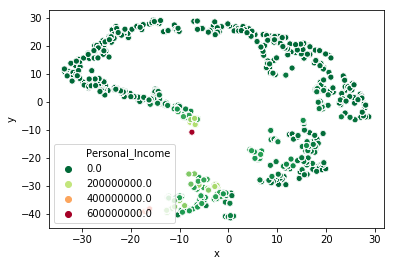

In [292]:
sns.scatterplot(x='x',y='y',hue='Personal_Income',data=maxim1, palette="RdYlGn_r")
plt.show()
# where is the 0 coming from for PI? 

In [293]:
nerva.loc[:,'UnemploymentRate'] = nerva.loc[:,'UnemploymentRate'].astype(float)
nerva.loc[:,'Personal_Income'] = nerva.loc[:,'Personal_Income'].astype(int)

In [294]:
newly = pd.merge(dcn,nerva,how='left',on=['Year','County','Disease','Count','Population']).dropna()
newly.head()

,Year,County,Disease,Count,Population,Personal_Income,UnemploymentRate
2,2011,Mariposa,Amebiasis,0,18237,676485.0,13.2
3,2013,Ventura,Amebiasis,7,842639,42313336.0,7.9
5,2009,Madera,Amebiasis,0,150151,3863788.0,13.4
6,2008,Santa Barbara,Amebiasis,6,419970,19022250.0,5.5
9,2009,Tehama,Amebiasis,0,63122,1756324.0,13.6
